## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [85]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [86]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [87]:
king_county.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [88]:
# answer below:

king_county = king_county.assign(log_sqft_living=np.log(king_county['sqft_living']))

Filter out columns and keeping only: price, bedrooms, bathrooms, log_sqft_living, floors, waterfront

In [89]:
# answer below:

keep_columns = ['price', 'bedrooms', 'bathrooms', 'log_sqft_living', 'floors', 'waterfront']

king_county = king_county[keep_columns]
king_county

price  bedrooms  bathrooms  log_sqft_living  floors  waterfront
0      221900.0         3       1.00         7.073270     1.0           0
1      538000.0         3       2.25         7.851661     2.0           0
2      180000.0         2       1.00         6.646391     1.0           0
3      604000.0         4       3.00         7.580700     1.0           0
4      510000.0         3       2.00         7.426549     1.0           0
...         ...       ...        ...              ...     ...         ...
21608  360000.0         3       2.50         7.333023     3.0           0
21609  400000.0         4       2.50         7.745003     2.0           0
21610  402101.0         2       0.75         6.927558     2.0           0
21611  400000.0         3       2.50         7.377759     2.0           0
21612  325000.0         2       0.75         6.927558     2.0           0

[21613 rows x 6 columns]

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [90]:
# answer below:

ds_useful.missingness_summary(king_county, print_log=True)

king_county.info()

waterfront         0.0
floors             0.0
log_sqft_living    0.0
bathrooms          0.0
bedrooms           0.0
price              0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
price              21613 non-null float64
bedrooms           21613 non-null int64
bathrooms          21613 non-null float64
log_sqft_living    21613 non-null float64
floors             21613 non-null float64
waterfront         21613 non-null int64
dtypes: float64(4), int64(2)
memory usage: 1013.2 KB


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [91]:
# answer below:

from sklearn.model_selection import train_test_split

Y = king_county['price']
X = king_county.drop('price', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

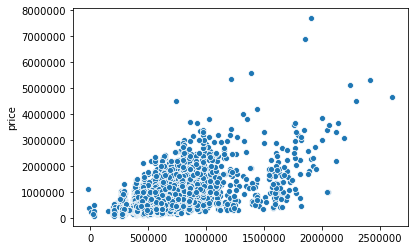

Model does not meed homoscedasticity assumption


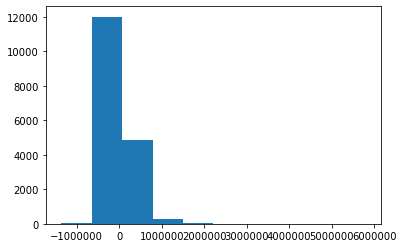

Test for normality of errors: NormaltestResult(statistic=13067.72070963636, pvalue=0.0)
Model fails error normalicy assumption
Model does pass the multicollinearity assumption


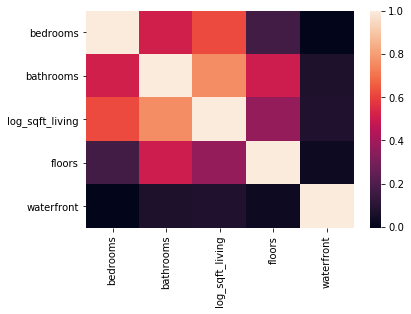

In [92]:
#answer below:
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

predictions = results.predict(X_train)

sns.scatterplot(predictions, Y_train)
plt.show()
print('Model does not meed homoscedasticity assumption')

residuals = Y_train - predictions
plt.hist(residuals)
plt.show()
print('Test for normality of errors: {}'.format(stats.normaltest(residuals)))
print('Model fails error normalicy assumption')

corr = X_train.corr()
sns.heatmap(data=corr)
print('Model does pass the multicollinearity assumption')

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

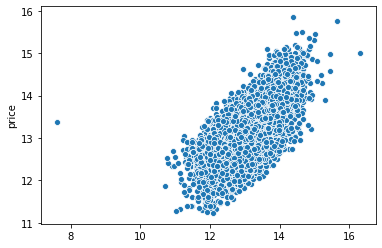

Model is much closer to meeting homoscedasticity assumption


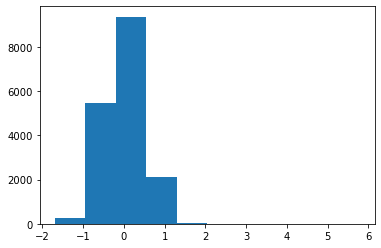

Test for normality of errors: NormaltestResult(statistic=623.7128576093091, pvalue=3.6515211804324584e-136)
Model passes error normalicy assumption
Model does pass the multicollinearity assumption


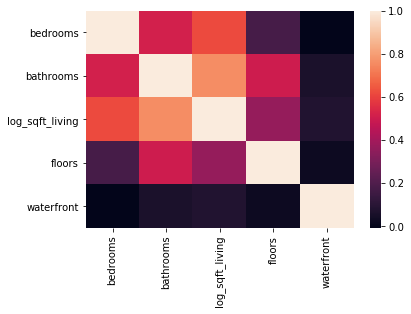

In [113]:
# answer below

log_Y = np.log(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, log_Y, test_size=.2, random_state=465)

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

predictions = results.predict(X_train)

sns.scatterplot(predictions, Y_train)
plt.show()
print('Model is much closer to meeting homoscedasticity assumption')

residuals = Y_train - predictions
plt.hist(residuals)
plt.show()
print('Test for normality of errors: {}'.format(stats.normaltest(residuals)))
print('Model passes error normalicy assumption')

corr = X_train.corr()
sns.heatmap(data=corr)
print('Model does pass the multicollinearity assumption')

Create a linear model and produce a model summary

In [114]:
# answer below

lrm = sm.OLS(Y_train, X_train)
results = lrm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.765e+06
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                        0.00
Time:                        14:04:42   Log-Likelihood:                         -11168.
No. Observations:               17290   AIC:                                  2.235e+04
Df Residuals:                   17285   BIC:                                  2.238e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms           -0.1760      0.005    -38.197      0.000      -0.185      -0.167
bathrooms          -0.2947      0.006    -47.832      0.000      -0.307      -0.283
log_sqft_living     1.8739      0.002    795.683      0.000       1.869       1.878
floors              0.0703      0.008      9.316      0.000       0.056       0.085
waterfront          0.4573      0.041     11.252      0.000       0.378       0.537
==============================================================================
Omnibus:                      623.713   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.224
Skew:                           0.222   Prob(JB):                    1.31e-302
Kurtosis:                       4.316   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

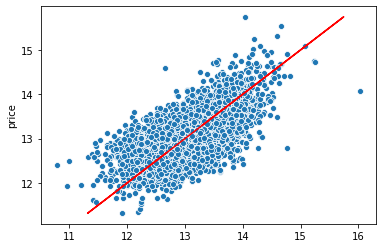

Mean Absolute Error (MAE): 0.37601831055303514
Mean Squared Error (MSE): 0.22058124959460623
Root Mean Squared Error (RMSE): 0.4696607814099515
Mean Absolute Percentage Error (MAPE): 2.8936263038664074
-----Test set statistics-----
Mean absolute error of the prediction is: 0.37601831055303514
Mean squared error of the prediction is: 0.22058124959460623
Root mean squared error of the prediction is: 0.4696607814099515
Mean absolute percentage error of the prediction is: 2.8936263038664074


In [116]:
# answer below:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

Y_preds_test = results.predict(X_test)

sns.scatterplot(x=Y_preds_test, y=Y_test)
plt.plot(Y_test, Y_test, color='r')
plt.show()

residuals = Y_preds_test - Y_test

my_mae = np.sum(np.abs(residuals))/residuals.count()
my_mse = np.sum(residuals**2)/residuals.count()
my_rmse = np.sqrt(my_mse)
my_mape = np.sum(np.abs(residuals)/Y_test)*100/residuals.count()

print('Mean Absolute Error (MAE): {}'.format(my_mae))
print('Mean Squared Error (MSE): {}'.format(my_mse))
print('Root Mean Squared Error (RMSE): {}'.format(my_rmse))
print('Mean Absolute Percentage Error (MAPE): {}'.format(my_mape))



print("-----Test set statistics-----")
# print("R-squared of the model in the test set is: {}".format(results.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds_test) / Y_test)) * 100))